In [1]:
#remove outlyers

In [2]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10,6)

In [3]:
df = pd.read_csv("anime_songs.csv")
df.sample(5)

,Unnamed: 0,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,name
306,0,0.0918,0.26800,5,-12.501,0,0.0348,0.95500,0.823,0.2200,0.0397,87.074,audio_features,2BDGENnWVU3kAvXkEzMvcr,spotify:track:2BDGENnWVU3kAvXkEzMvcr,https://api.spotify.com/v1/tracks/2BDGENnWVU3k...,https://api.spotify.com/v1/audio-analysis/2BDG...,298613,4,tema principale: orchestra dedicata ai maestri
66,0,0.4120,0.88500,2,-3.812,1,0.0578,0.00157,0.000,0.1320,0.5690,90.027,audio_features,6sz0Rbp0MbQDIZDz6p5a3O,spotify:track:6sz0Rbp0MbQDIZDz6p5a3O,https://api.spotify.com/v1/tracks/6sz0Rbp0MbQD...,https://api.spotify.com/v1/audio-analysis/6sz0...,266227,4,うらがわの存在
398,0,0.2400,0.00772,10,-28.248,1,0.0452,0.97400,0.930,0.0756,0.0364,75.027,audio_features,73fSc5LqSBGYvMznxAsWdL,spotify:track:73fSc5LqSBGYvMznxAsWdL,https://api.spotify.com/v1/tracks/73fSc5LqSBGY...,https://api.spotify.com/v1/audio-analysis/73fS...,188272,4,Revelation
335,0,0.2240,0.00414,9,-28.348,1,0.0475,0.98800,0.915,0.0867,0.2470,134.858,audio_features,5L9bHB7esLqCQPETVQcP7W,spotify:track:5L9bHB7esLqCQPETVQcP7W,https://api.spotify.com/v1/tracks/5L9bHB7esLqC...,https://api.spotify.com/v1/audio-analysis/5L9b...,144520,3,The Promised Neverland (Epf solo Version)
135,0,0.6710,0.76000,8,-2.852,1,0.0570,0.06390,0.000,0.1240,0.7960,107.007,audio_features,1P1PgGMrzIVMju7TOqMGBy,spotify:track:1P1PgGMrzIVMju7TOqMGBy,https://api.spotify.com/v1/tracks/1P1PgGMrzIVM...,https://api.spotify.com/v1/audio-analysis/1P1P...,216672,4,ここで息をして


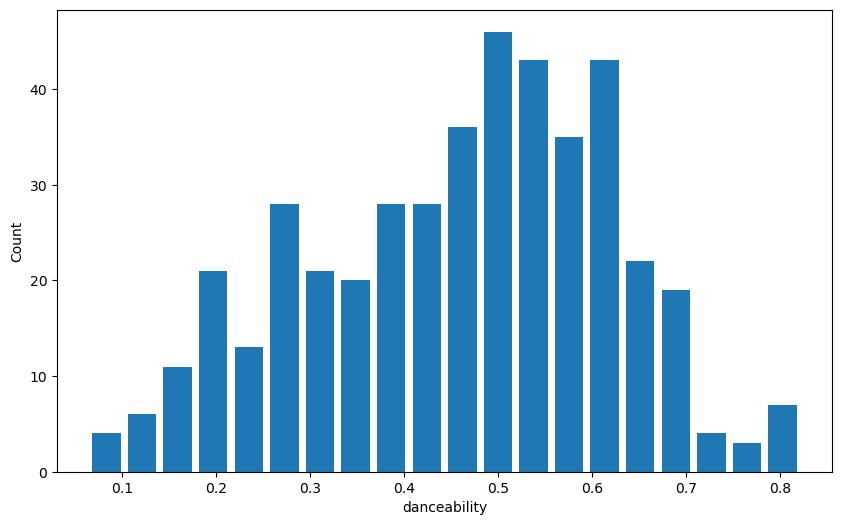

In [4]:
plt.hist(df.danceability, bins=20, rwidth=0.8)
plt.xlabel('danceability')
plt.ylabel('Count')
plt.show()

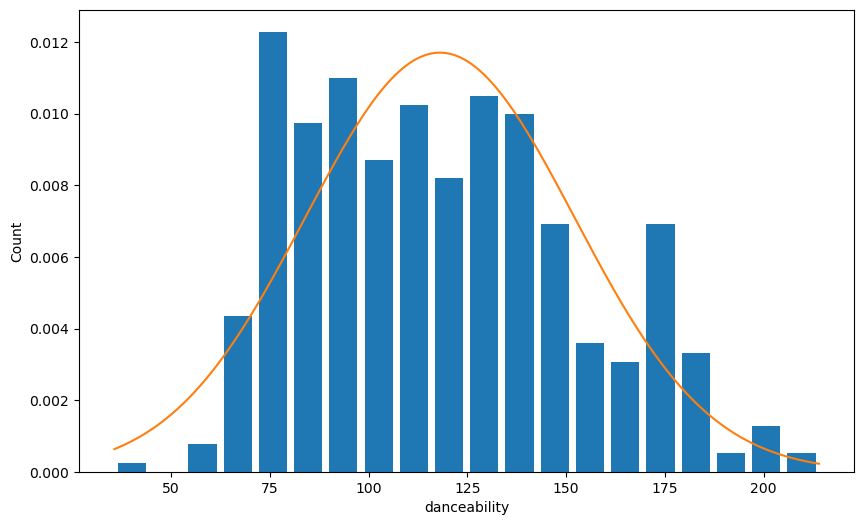

In [5]:
from scipy.stats import norm
import numpy as np
plt.hist(df.tempo, bins=20, rwidth=0.8, density=True)
plt.xlabel('danceability')
plt.ylabel('Count')

rng = np.arange(df.tempo.min(), df.tempo.max(), 0.1)
plt.plot(rng, norm.pdf(rng,df.tempo.mean(),df.tempo.std()))

NameError: name 'sns' is not defined

NameError: name 'songs_scaled' is not defined

NameError: name 'km' is not defined

In [9]:
ax=sns.scatterplot(data=customers,
              x= 'danceability',
              y= 'speechiness',
              s=100)

NameError: name 'sns' is not defined

In [10]:
ax=sns.scatterplot(data=customers,
              x= 'danceability',
              y= 'acousticness',
              s=100)

NameError: name 'sns' is not defined

In [11]:
ax=sns.scatterplot(data=customers,
              x= 'danceability',
              y= 'instrumentalness',
              s=100)

NameError: name 'sns' is not defined

In [12]:
ax=sns.scatterplot(data=customers,
              x= 'danceability',
              y= 'liveness',
              s=100)

NameError: name 'sns' is not defined

In [13]:
ax=sns.scatterplot(data=customers,
              x= 'danceability',
              y= 'valence',
              s=100)

NameError: name 'sns' is not defined

In [14]:
ax=sns.scatterplot(data=customers,
              x= 'danceability',
              y= 'tempo',
              s=100)

NameError: name 'sns' is not defined

In [15]:
ax=sns.scatterplot(data=customers,
              x= 'valence',
              y= 'type',
              s=100)

NameError: name 'sns' is not defined

In [16]:
ax=sns.scatterplot(data=customers,
              x= 'energy',
              y= 'loudness',
              s=100)

NameError: name 'sns' is not defined

In [17]:
ax=sns.scatterplot(data=customers,
              x= 'energy',
              y= 'speechiness',
              s=100)

NameError: name 'sns' is not defined

In [18]:
ax=sns.scatterplot(data=customers,
              x= 'energy',
              y= 'acousticness',
              s=100)

NameError: name 'sns' is not defined

In [19]:
ax=sns.scatterplot(data=customers,
              x= 'energy',
              y= 'instrumentalness',
              s=100)

NameError: name 'sns' is not defined

In [20]:
ax=sns.scatterplot(data=customers,
              x= 'energy',
              y= 'liveness',
              s=100)

NameError: name 'sns' is not defined

In [21]:
ax=sns.scatterplot(data=customers,
              x= 'energy',
              y= 'valence',
              s=100)

NameError: name 'sns' is not defined

In [22]:
ax=sns.scatterplot(data=customers,
              x= 'energy',
              y= 'tempo',
              s=100)

NameError: name 'sns' is not defined

In [23]:
ax=sns.scatterplot(data=customers,
              x= 'loudness',
              y= 'speechiness',
              s=100)

NameError: name 'sns' is not defined

In [24]:
ax=sns.scatterplot(data=customers,
              x= 'loudness',
              y= 'acousticness',
              s=100)

NameError: name 'sns' is not defined

In [25]:
ax=sns.scatterplot(data=customers,
              x= 'loudness',
              y= 'instrumentalness',
              s=100)

NameError: name 'sns' is not defined

In [26]:
ax=sns.scatterplot(data=customers,
              x= 'loudness',
              y= 'liveness',
              s=100)

NameError: name 'sns' is not defined

In [27]:
ax=sns.scatterplot(data=customers,
              x= 'loudness',
              y= 'valence',
              s=100)

NameError: name 'sns' is not defined

In [28]:
ax=sns.scatterplot(data=customers,
              x= 'loudness',
              y= 'tempo',
              s=100)

NameError: name 'sns' is not defined

In [29]:
ax=sns.scatterplot(data=customers,
              x= 'speechiness',
              y= 'acousticness',
              s=100)

NameError: name 'sns' is not defined

In [30]:
ax=sns.scatterplot(data=customers,
              x= 'speechiness',
              y= 'instrumentalness',
              s=100)

NameError: name 'sns' is not defined

In [31]:
ax=sns.scatterplot(data=customers,
              x= 'speechiness',
              y= 'liveness',
              s=100)

NameError: name 'sns' is not defined

In [32]:
ax=sns.scatterplot(data=customers,
              x= 'speechiness',
              y= 'valence',
              s=100)

NameError: name 'sns' is not defined

In [33]:
ax=sns.scatterplot(data=customers,
              x= 'speechiness',
              y= 'tempo',
              s=100)

NameError: name 'sns' is not defined

In [34]:
ax=sns.scatterplot(data=customers,
              x= 'acousticness',
              y= 'instrumentalness',
              s=100)

NameError: name 'sns' is not defined

In [35]:
ax=sns.scatterplot(data=customers,
              x= 'acousticness',
              y= 'liveness',
              s=100)

NameError: name 'sns' is not defined

In [36]:
ax=sns.scatterplot(data=customers,
              x= 'acousticness',
              y= 'valence',
              s=100)

NameError: name 'sns' is not defined

In [37]:
ax=sns.scatterplot(data=customers,
              x= 'acousticness',
              y= 'tempo',
              s=100)

NameError: name 'sns' is not defined

In [38]:
ax=sns.scatterplot(data=customers,
              x= 'instrumentalness',
              y= 'liveness',
              s=100)

NameError: name 'sns' is not defined

In [39]:
ax=sns.scatterplot(data=customers,
              x= 'instrumentalness',
              y= 'valence',
              s=100)

NameError: name 'sns' is not defined

In [40]:
ax=sns.scatterplot(data=customers,
              x= 'instrumentalness',
              y= 'tempo',
              s=100)

NameError: name 'sns' is not defined

In [41]:
ax=sns.scatterplot(data=customers,
              x= 'liveness',
              y= 'valence',
              s=100)

NameError: name 'sns' is not defined

In [42]:
ax=sns.scatterplot(data=customers,
              x= 'liveness',
              y= 'tempo',
              s=100)

NameError: name 'sns' is not defined

In [43]:
ax=sns.scatterplot(data=customers,
              x= 'valence',
              y= 'tempo',
              s=100)

NameError: name 'sns' is not defined